In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Model Comparisons
This report will show the model performance for the experimental models and the final production model.

In [8]:
__author__ = "John Hoff"
__email__ = "john.hoff@braindonor.net"
__copyright__ = "Copyright 2019, John Hoff"
__license__ = "Creative Commons Attribution-ShareAlike 4.0 International License"
__version__ = "1.0.0"

import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    
from IPython.display import display, Markdown

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve

In [9]:
def custom_classification_report(title, predict_file, predict_proba_file):
    """
    Display a classification report for the performance of the predicted values.
    :param title: Title to display for the report.
    :param predict_file: File Containing Class Predictions
    :param predict_proba_file: File Containing Class Prediction Probabilities
    :return: 
    """
    display(Markdown('## %s' % title))
    with open(predict_file, 'rb') as file:
        frame = pickle.load(file)
        y_test = frame.y_actual
        y_test_predict = frame.y_predict
        display(Markdown('#### Confusion Matrix'))
        matrix = confusion_matrix(y_test, y_test_predict)

        plt.figure(figsize=(12,12))
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

        color_mid = matrix.max() / 2.
        for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
            plt.text(j, i, matrix[i, j], fontsize=10,
                     horizontalalignment="center",
                     verticalalignment='center',
                     color="white" if matrix[i, j] > color_mid else "black")

        ticks = np.arange(len(np.unique(y_test)))
        classes = np.unique(y_test)
        plt.xticks(ticks, classes)
        plt.yticks(ticks, classes)
        plt.ylabel('True Class', fontsize=20, rotation=90)
        plt.xlabel('Predicted Class', fontsize=20)
        plt.show()

        display(Markdown('#### scikit-learn classification_report'))
        print(classification_report(y_test, y_test_predict))
        
        display(Markdown('#### Accuracy Score'))
        print('%f' % accuracy_score(y_test, y_test_predict))
        
    with open(predict_proba_file, 'rb') as file:
        frame = pickle.load(file)
        display(Markdown('#### Log Loss Score'))
        print('%f' % log_loss(frame.y_actual, frame.y_predict))
        
        display(Markdown('#### ROC Curves for All Classes'))
        plt.figure(figsize=(10,10))
        for class_number in np.unique(frame.y_actual):
            y_converted = []
            for y in frame.y_actual:
                if y == class_number:
                    y_converted.append(1)
                else:
                    y_converted.append(0)
            fpr, tpr, threshold = roc_curve(y_converted, frame.y_predict[:,1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label='%0.3f AUC - Class %s' % (roc_auc, int(class_number)))
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'k--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

# Experimental Model Performance

## XGBoost Ordinal Unbalanced

#### Confusion Matrix

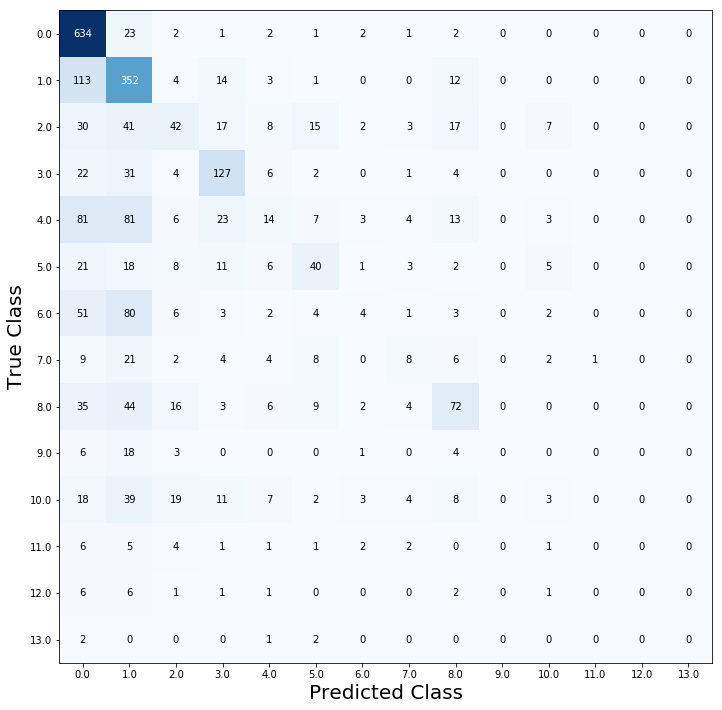

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.61      0.95      0.75       668
         1.0       0.46      0.71      0.56       499
         2.0       0.36      0.23      0.28       182
         3.0       0.59      0.64      0.62       197
         4.0       0.23      0.06      0.09       235
         5.0       0.43      0.35      0.39       115
         6.0       0.20      0.03      0.05       156
         7.0       0.26      0.12      0.17        65
         8.0       0.50      0.38      0.43       191
         9.0       0.00      0.00      0.00        32
        10.0       0.12      0.03      0.04       114
        11.0       0.00      0.00      0.00        23
        12.0       0.00      0.00      0.00        18
        13.0       0.00      0.00      0.00         5

   micro avg       0.52      0.52      0.52      2500
   macro avg       0.27      0.25      0.24      2500
weighted avg       0.43      0.52      0.45      2500



c:\users\jhoff\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy Score

0.518400


#### Log Loss Score

1.578678


#### ROC Curves for All Classes

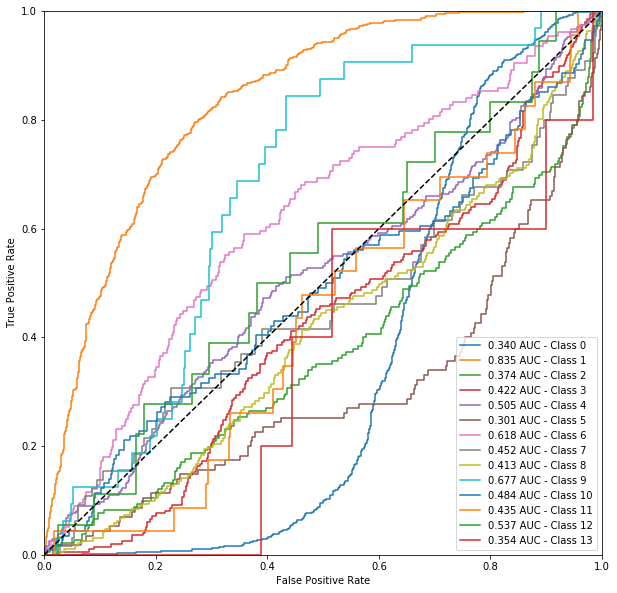

In [10]:
custom_classification_report(
    'XGBoost Ordinal Unbalanced',
    'model/experiment/output/xgboost_ordinal_unbalanced_predict.p',
    'model/experiment/output/xgboost_ordinal_unbalanced_predict_proba.p'
)